In [1]:
import dabl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dabl.preprocessing import detect_types, clean
from dabl.plotting import plot_supervised
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
avocado = pd.read_csv("/home/andy/datasets/avocado.csv", parse_dates=['Date'])
telco_churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#restaurant = pd.read_csv("/home/andy/datasets/restaurant-and-market-health-violations.csv")
titanic = pd.read_csv("dabl/tests/titanic.csv")
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")
target = 'Comb Unadj FE - Conventional Fuel'
#accidents = pd.read_csv("/home/andy/datasets/Acc.csv")
#violations = pd.read_csv("/home/andy/datasets/Traffic_Violations.csv")
adult = pd.read_csv("/home/andy/datasets/adult.csv")

# individual_donations = pd.read_csv("/home/andy/datasets/itcont.txt")
# FIXME add rent stuff from first year
# FIXME add stuff from Gael's papers

In [3]:
from sklearn.datasets import fetch_openml
# credit-g
data = pd.read_excel("/home/andy/datasets/AmesHousing.xls")

In [4]:
# bank marketing
data = fetch_openml(data_id=1461)

In [1]:
# analcat
data = fetch_openml(data_id=469)

NameError: name 'fetch_openml' is not defined

In [2]:
data = pd.read_csv("/home/andy/datasets/adult.csv")
target = 'income'

In [3]:
from sklearn.datasets import fetch_openml

def make_data_df(data_bunch):
    try:
        feature_names = data_bunch.feature_names
    except AttributeError:
        feature_names = ['x%d' % i for i in range(data_bunch.data.shape[1])]
    df = pd.DataFrame(data_bunch.data, columns=feature_names)
    try:
        df['target'] = data_bunch.target_names[data_bunch.target]
    except AttributeError:
        df['target'] = data_bunch.target
    return df

from sklearn.datasets import load_diabetes, load_boston, load_iris, load_digits, load_breast_cancer
diabetes = load_diabetes()
boston = load_boston()

In [12]:
data = make_data_df(load_breast_cancer())
target = 'target'

In [8]:
data = make_data_df(fetch_openml(data_id=469))
target = 'target'

In [9]:
from dabl.preprocessing import clean

data = clean(data)
type_hints = {c: 'categorical' for c in data.columns[data.apply(lambda x: x.nunique()) <=10]}
data = clean(data, type_hints=type_hints)

In [10]:
from dabl.preprocessing import clean
data = clean(data)

In [11]:
data.shape

(797, 5)

In [6]:
#data = pd.read_csv("dabl/tests/titanic.csv", na_values=['?'])
data = pd.read_csv("dabl/tests/titanic.csv")
target = 'survived'

In [25]:
data = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
target = 'SalePrice'

In [4]:
data = make_data_df(load_digits())
target = 'target'

In [4]:
data = adult
target = 'income'

In [2]:
data = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
target = 'Churn'

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


Target looks like classification
baseline score: 0.500
baseline score: 0.500


/home/andy/checkout/scikit-learn/sklearn/feature_selection/mutual_info_.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if discrete_features == 'auto':


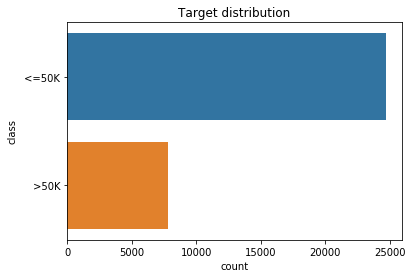

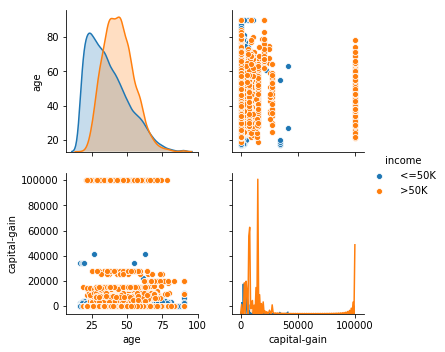

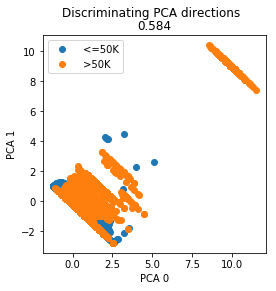

<Figure size 0x288 with 0 Axes>

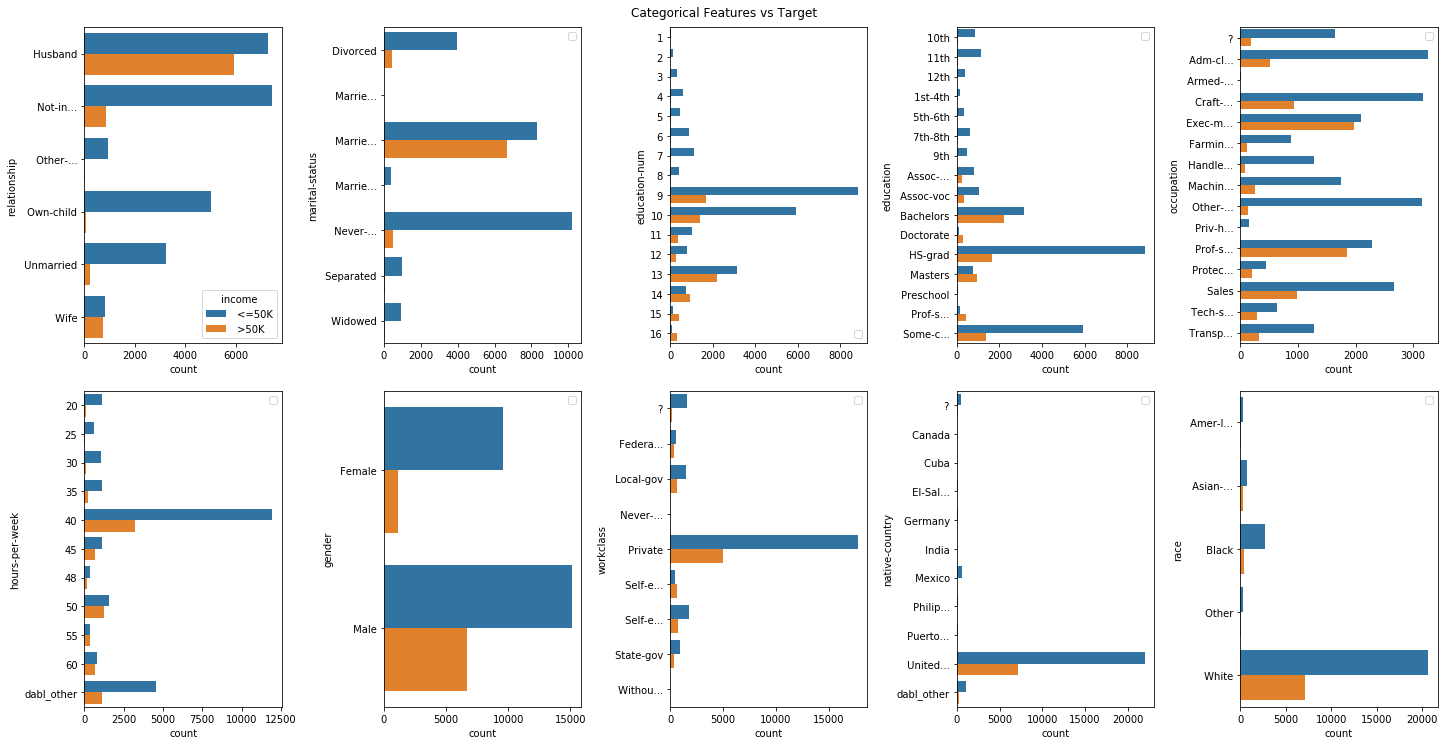

In [9]:
plot_supervised(clean(data, type_hints={'capital-gain': 'continuous', 'age':'continuous'}), target)

In [10]:
from dabl.models import EasyClassifier
ec = EasyClassifier().fit(data, target_col=target)

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


DummyClassifier(strategy='prior')
accuracy: 0.7592    average_precision: 0.2408    recall_macro: 0.5000    roc_auc: 0.5000    
new best (using recall macro):
accuracy             0.75919
average_precision    0.24081
recall_macro         0.50000
roc_auc              0.50000
Name: DummyClassifier(strategy='prior'), dtype: float64
GaussianNB()
accuracy: 0.5084    average_precision: 0.3728    recall_macro: 0.6591    roc_auc: 0.7219    
new best (using recall macro):
accuracy             0.508432
average_precision    0.372784
recall_macro         0.659142
roc_auc              0.721880
Name: GaussianNB(), dtype: float64
MultinomialNB()
accuracy: 0.7944    average_precision: 0.6606    recall_macro: 0.7732    roc_auc: 0.8682    
new best (using recall macro):
accuracy             0.794355
average_precision    0.660584
recall_macro         0.773171
roc_auc              0.868248
Name: MultinomialNB(), dtype: float64
DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.7103   

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight='balanced', multi_class='auto',
          solver='lbfgs')
accuracy: 0.7764    average_precision: 0.6859    recall_macro: 0.7969    roc_auc: 0.8784    
new best (using recall macro):
accuracy             0.776389
average_precision    0.685911
recall_macro         0.796911
roc_auc              0.878391
Name: LogisticRegression(C=0.1, class_weight='balanced', multi_class='auto',\n          solver='lbfgs'), dtype: float64
Best model:
LogisticRegression(C=0.1, class_weight='balanced', multi_class='auto',
          solver='lbfgs')
Best Scores:
accuracy             0.776389
average_precision    0.685911
recall_macro         0.796911
roc_auc              0.878391
Name: LogisticRegression(C=0.1, class_weight='balanced', multi_class='auto',\n          solver='lbfgs'), dtype: float64


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


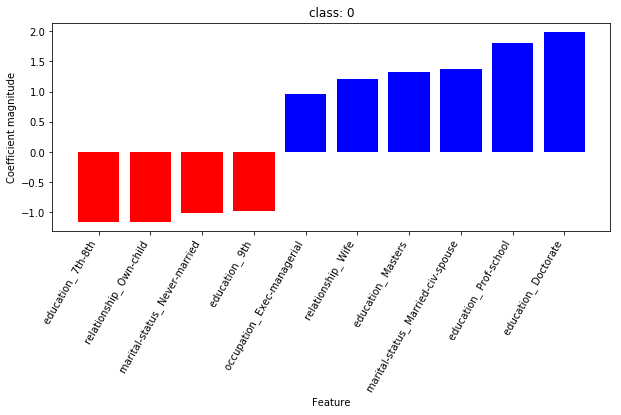

In [11]:
from dabl.explain import explain
explain(ec)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from dabl import EasyPreprocessor
from sklearn.tree import DecisionTreeClassifier
import sklearn
sklearn.set_config(print_changed_only=True)

In [4]:
param_grid = {'decisiontreeclassifier__max_leaf_nodes': []}
pipe = make_pipeline(EasyPreprocessor(), DecisionTreeClassifier(max_leaf_nodes=100))

In [5]:
pipe.fit(data.drop(target, axis=1), data[target])

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


Pipeline(steps=[('easypreprocessor', EasyPreprocessor()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_leaf_nodes=100))])

DecisionTreeClassifier(max_leaf_nodes=100)
Depth: 16
Number of leaves: 100


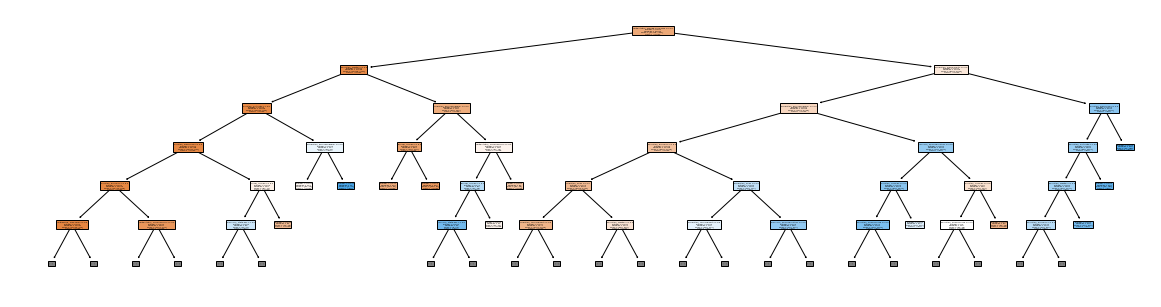

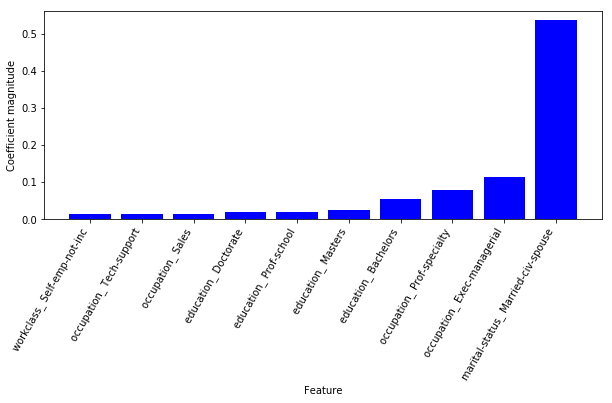

In [11]:
from dabl.explain import explain
plt.figure(figsize=(0, 5))
explain(pipe, feature_names=data.drop(target, axis=1).columns )

In [6]:
from scipy import stats

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
from dabl import RandomSuccessiveHalving
param_dist = {'decisiontreeclassifier__max_leaf_nodes': stats.randint(2, 500)}

In [10]:
sh = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=50)

In [14]:
sh = RandomSuccessiveHalving(pipe, param_distributions=param_dist, verbose=10)

In [12]:
data = clean(data)

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


In [15]:
sh.fit(data.drop(target, axis=1), data[target])

/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2058: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 8
r_min_: 12
max_budget_: 32561
aggressive_elimination: False
force_exhaust_budget: False
ratio: 3
----------
iter_i: 0
n_candidates: 492
r_i: 12
r_i (in r_min units): 1
Fitting 3 folds for each of 492 candidates, totalling 1476 fits
[CV] decisiontreeclassifier__max_leaf_nodes=200 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=200, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=200 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=200, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=200 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=200, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=226 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:643: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=226, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=226 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=226, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=226 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=226, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=112 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=112, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=112 ......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=112, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=112 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=112, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=138 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=138, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=138 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=138, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=138 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=138, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=24 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=24, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=24 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=24, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=24 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=24, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=50 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=50, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=50 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=50, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=50 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=50, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=279 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=279, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=279 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=279, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=279 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=279, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=191 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=191, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=191 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=191, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=191 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=172 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=172, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=172 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=172, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=172 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=172, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=103 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=103, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=103 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=103, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=103 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=103, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=427 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=427, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=427 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=427, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=427 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=427, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=121 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=121, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=121 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=121, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=121 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=121, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=84 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=84, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=84 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=84, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=84 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=84, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=15 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=15, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=15 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=15, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=15 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=15, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=339 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=339, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=339 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=339, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=339 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=339, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=33 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=33, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=33 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=33, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=33 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=33, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=251 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=251, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=251 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=251, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=251 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=476, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=476 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=476, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=178 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=178, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=178 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=178, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=178 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=178, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=425 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=425, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=425 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=425, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=425 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=425, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=90 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=90, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=90 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=90, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=90 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=90, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=414 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=414, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=414 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=414, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=414 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=414, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=75 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=75, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=75 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=75, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=75 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=75, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=337 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=337, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=337 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=337, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=337 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=337, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=0.889, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=326 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=326, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=326 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=326, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=326 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=326, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=212 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=212, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=212 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=212, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=212 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=212, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=467, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=467 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=467, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=161 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=161, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=161 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=161, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=161 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=161, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=124 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=124, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=124 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=124, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=124 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=124, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=379 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=379, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=379 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=379, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=379 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=379, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=397 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=397, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=397 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=397, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=397 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=397, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=62 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=62, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=62 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=62, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=62 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=62, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=221 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=221, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=221 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=221, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=221 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=221, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=428 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=428, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=428 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=428, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=428 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=428, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=454 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=454, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=454 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=454, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=454 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=454, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=115 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=115, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=115 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=115, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=115 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=472, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=472 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=472, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=133 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=133, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=133 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=133, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=133 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=133, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=366 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=366, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=366 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=366, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=366 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=366, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=27 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=27, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=27 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=27, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=27 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=27, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=384 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=384, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=384 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=384, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=384 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=384, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=452 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=452, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=452 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=452, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=452 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=452, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=45 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=45, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=45 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=45, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=45 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=45, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=252 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=252, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=252 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=252, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=252 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=252, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=296 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=296, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=296 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=296, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=296 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=296, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=364 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=364, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=364 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=364, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=364 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=364, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=164 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=164, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=164 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=164, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=164 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=164, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=190 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=190, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=190 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=190, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=190 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=190, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=208 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=208, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=208 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=208, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=208 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=208, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=276 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=276, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=276 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=276, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=276 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=276, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=437 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=437, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=437 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=437, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=437 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=120 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=120, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=120 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=120, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=120 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=120, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=349 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=349, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=349 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=349, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=349 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=349, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=14 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=14, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=14 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=14, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=14 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=14, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=375 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=375, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=375 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=375, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=375 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=375, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=443 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=443, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=443 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=443, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=443 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=443, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=100 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=100, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=100 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=100, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=100 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=100, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=261 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=261, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=261 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=261, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=261 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=287, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=287 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=287, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=355 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=355, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=355 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=355, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=355 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=355, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=494 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=494, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=494 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=494, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=494 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=494, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=12 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=12, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=12 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=12, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=12 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=12, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=155 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=155, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=155 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=155, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=155 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=155, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=173 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=173, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=173 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=173, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=173 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=173, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=380 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=380, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=380 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=380, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=380 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=380, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=267 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=267, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=267 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=267, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=267 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=267, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=406 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=406, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=406 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=406, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=406 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=406, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=450 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=450, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=450 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=450, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=450 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=450, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=111 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=111 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=111 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=179 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=179, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=179 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=179, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=179 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=179, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=336 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=336, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=336 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=336, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=336 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=336, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=404 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=404, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=404 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=404, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=362 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=362, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=362 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=362, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=362 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=362, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=430 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=430, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=430 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=430, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=430 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=430, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=204 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=204, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=204 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=204, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=204 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=204, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=248 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=248, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=248 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=248, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=248 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=248, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=316 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=316, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=316 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=316, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=316 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=316, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=459 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=459, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=459 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=459, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=459 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=459, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=342, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=342, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=342, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=477 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=477, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=477 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=477, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=477 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=477, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=228 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=228, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=228 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=228, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=228 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=228, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=254 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=254, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=254 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=254, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=254 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=254, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=389 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=389, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=389 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=389, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=389 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=389, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=415 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=415, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=415 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=415, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=415 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=415, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=483 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=483, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=483 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=483, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=483 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=483, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=283 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=283, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=283 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=283, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=283 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=283, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=327 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=327, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=327 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=327, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=327 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=327, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=345 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=345, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=345 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=345, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=345 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=345, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=78 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=78, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=78 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=78, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=78 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=78, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=213 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=213, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=213 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=213, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=213 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=213, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=239 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=239, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=239 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=239, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=239 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=239, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=257 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=257, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=257 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=257, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=257 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=257, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=446 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=446, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=446 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=446, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=446 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=446, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=325 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=325, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=325 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=325, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=325 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=325, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=464 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=464, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=464 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=464, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=464 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=464, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=237 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=237, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=237 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=237, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=237 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=237, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=376 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=376, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=376 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=376, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=376 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=376, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=444 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=444, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=444 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=444, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=402 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=402, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=402 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=402, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=402 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=402, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=131 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=131, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=131 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=131, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=131 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=131, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=270 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=270, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=270 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=270, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=270 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=270, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=149 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=149, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=149 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=149, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=149 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=149, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=288 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=288, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=288 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=288, score=(train=1.000, test=0.500), total=   0.2s
[CV] decisiontreeclassifier__max_leaf_nodes=288 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=288, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=314 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=314, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=314 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=314, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=314 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=314, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=382 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=382, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=382 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=382, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=382 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=382, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=43 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=43, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=43 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=43, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=43 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=43, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=400 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=400, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=400 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=400, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=400 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=400, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=61 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=61, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=61 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=61, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=61 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=61, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=268 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=268, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=268 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=268, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=268 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=268, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=294 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=294, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=294 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=294, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=294 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=294, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=429 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=429, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=429 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=429, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=429 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=429, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=206 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=206, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=206 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=206, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=206 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=206, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=341 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=341, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=341 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=341, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=341 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=341, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=224 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=224, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=224 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=224, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=224 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=224, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=367 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=367, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=367 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=367, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=367 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=367, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=435 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=435, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=435 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=435, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=435 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=435, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=385 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=385, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=385 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=385, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=385 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=385, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=118 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=118, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=118 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=118, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=118 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=118, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=365 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=365, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=365 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=365, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=365 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=365, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=259 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=259, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=259 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=259, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=259 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=259, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=277 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=277, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=277 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=277, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=277 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=277, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=416 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=416, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=416 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=416, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=416 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=416, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=303 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=303, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=303 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=303, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=303 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=303, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=484 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=484, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=484 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=484, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=484 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=442 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=442 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=171 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=171, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=171 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=171, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=171 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=171, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=215 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=215, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=215 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=215, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=215 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=215, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=422 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=422, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=422 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=422, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=422 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=422, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=83 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=83, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=83 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=83, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=83 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=83, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=101 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=101, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=101 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=101, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=101 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=101, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=466 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=466, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=466 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=466, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=466 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=466, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=127 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=127, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=127 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=127, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=127 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=127, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=308 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=308, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=308 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=308, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=308 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=308, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=352 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=352, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=352 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=352, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=352 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=352, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=39 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=39, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=39 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=39, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=39 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=39, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=1.000), total=   0.2s
[CV] decisiontreeclassifier__max_leaf_nodes=107 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=107, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=107 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=107, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=107 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=107, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=246 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=246, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=246 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=246, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=246 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=246, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=264 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=264, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=264 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=264, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=264 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=264, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=290 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=290, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=290 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=290, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=290 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=290, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=475 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=475, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=475 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=475, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=475 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=475, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=132 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=132, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=132 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=132, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=132 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=132, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=19 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=19, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=19 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=19, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=19 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=19, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=176 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=176, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=176 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=176, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=176 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=176, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=387 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=387, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=387 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=387, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=387 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=387, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=405 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=405, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=405 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=405, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=405 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=405, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=70 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=70, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=70 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=70, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=70 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=70, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=431 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=431, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=431 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=431, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=431 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=431, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=449 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=449, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=449 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=449, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=449 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=449, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=299 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=299, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=299 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=299, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=299 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=299, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=317 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=317, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=317 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=317, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=317 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=343, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=343 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=343, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=343 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=343, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=361 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=361, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=361 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=361, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=361 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=361, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=68 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=68, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=68 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=68, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=68 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=68, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=211 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=211, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=211 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=211, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=211 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=211, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=94 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=94, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=94 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=94, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=94 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=94, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=229 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=229, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=229 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=229, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=229 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=229, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=255 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=255, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=255 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=255, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=255 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=255, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=273 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=273, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=273 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=273, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=273 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=462, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=462 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=462, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=123 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=123, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=123 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=123, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=123 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=123, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=480 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=480, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=480 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=480, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=480 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=480, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=6 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=6, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=6 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=6, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=6 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=6, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=141 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=141, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=141 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=141, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=141 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=141, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=185 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=185, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=185 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=185, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=185 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=185, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=374 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=374, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=374 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=374, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=374 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=374, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=35 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=35, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=35 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=35, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=35 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=35, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=392 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=392, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=392 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=392, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=392 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=392, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=53 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=53, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=53 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=53, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=53 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=53, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=418 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=418, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=418 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=418, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=418 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=418, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=147 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=147, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=147 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=147, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=147 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=97, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=97 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=97, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=9 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=9, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=9 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=9, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=9 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=9, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=284 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=284, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=284 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=284, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=284 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=284, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=242 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=242, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=242 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=242, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=242 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=310, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=310 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=310, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=445 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=445, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=445 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=445, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=445 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=445, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=110 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=110, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=110 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=110, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=110 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=110, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=128 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=128, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=128 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=128, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=128 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=128, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=196 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=196, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=196 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=196, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=196 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=196, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=154 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=154, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=154 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=154, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=154 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=154, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=222 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=222, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=222 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=222, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=222 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=222, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=383 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=383, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=383 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=383, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=383 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=383, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=40 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=40, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=40 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=40, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=40 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=40, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=401 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=401, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=401 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=401, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=401 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=401, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=66 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=66, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=66 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=66, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=66 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=134, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=269 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=269, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=269 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=269, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=269 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=269, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=152 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=152, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=152 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=152, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=152 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=152, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=363 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=363, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=363 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=363, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=363 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=363, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=313 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=313, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=313 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=313, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=313 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=313, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=381 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=381, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=381 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=381, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=381 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=381, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=46 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=46, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=46 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=46, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=46 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=46, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=407 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=407, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=407 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=407, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=407 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=407, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=181 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=181, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=181 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=181, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=181 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=64, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=64 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=64, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=275 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=275, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=275 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=275, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=275 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=275, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=225 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=225, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=225 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=225, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=225 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=225, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=293 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=293, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=293 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=293, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=293 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=293, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=187 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=187, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=187 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=187, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=187 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=187, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=137 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=137, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=137 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=137, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=137 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=137, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=231 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=231, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=231 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=231, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=231 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=231, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=412 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=412, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=412 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=412, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=412 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=412, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=5 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=5, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=5 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=5, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=5 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=5, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=438 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=438, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=438 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=438, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=438 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=438, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=31 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=31, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=31 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=31, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=31 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=31, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=482 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=482, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=482 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=482, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=482 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=256, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=256 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=256, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=143 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=143, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=143 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=143, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=143 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=143, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=324 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=324, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=324 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=324, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=324 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=324, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=350 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=350, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=350 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=350, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=350 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=350, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=368 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=368, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=368 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=368, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=368 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=368, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=29 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=29, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=29 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=29, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=29 ...................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=394, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=394 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=394, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=168 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=168, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=168 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=168, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=168 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=168, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=55 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=55, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=55 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=55, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=55 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=55, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=236 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=236, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=236 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=236, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=236 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=236, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=194 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=194, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=194 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=194, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=194 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=194, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=262 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=262, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=262 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=262, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=262 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=262, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=280 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=280, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=280 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=280, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=280 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=280, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=423 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=423, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=423 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=423, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=423 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=423, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=306 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=306, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=306 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=306, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=306 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=306, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=491 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=491, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=491 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=491, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=491 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=491, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=80 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=80, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=80 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=80, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=80 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=80, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=148, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=148 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=148, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=148 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=148, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=106 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=106, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=106 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=106, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=106 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=106, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=174 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=174, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=174 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=174, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=174 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=174, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=192 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=192, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=192 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=192, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=192 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=192, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=335 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=335, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=335 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=335, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=335 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=335, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=403 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=403, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=403 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=403, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=403 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=403, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=60 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=60, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=60 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=60, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=60 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=60, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=421 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=421, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=421 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=421, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=421 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=421, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=18 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=18, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=18 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=18, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=18 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=18, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=86 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=86, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=86 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=86, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=86 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=86, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=104 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=104, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=104 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=104, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=104 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=104, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=465 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=465, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=465 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=465, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=465 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=465, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=247 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=247, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=247 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=247, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=247 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=247, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=130 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=130, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=130 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=130, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=130 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=130, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=315 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=315, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=315 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=315, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=315 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=315, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=265 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=265, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=265 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=265, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=265 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=265, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=333 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=333, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=333 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=333, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=333 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=333, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=359 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=359, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=359 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=359, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=359 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=359, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=498, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=498, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ...............

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=16, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=16 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=16, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=377 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=377, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=377 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=377, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=377 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=377, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=159 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=159, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=159 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=159, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=159 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=159, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=42 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=42, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=42 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=42, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=42 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=42, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=177 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=177, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=177 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=177, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=177 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=177, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=245 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=245, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=245 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=245, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=245 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=245, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=271 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=271, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=271 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=271, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=271 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=271, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=410 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=410, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=410 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=410, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=410 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=410, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=289 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=289, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=289 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=289, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=289 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=289, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=71 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=71, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=71 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=71, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=71 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=496 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=496 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=157 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=157, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=157 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=157, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=157 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=157, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=183 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=183, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=183 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=183, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=183 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=183, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=322 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=322, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=322 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=322, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=322 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=322, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=201 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=201, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=201 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=201, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=201 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=201, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=390 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=390, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=390 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=390, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=390 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=390, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=408 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=408, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=408 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=408, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=408 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=408, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=69 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=69, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=69 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=69, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=69 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=69, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=434 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=434, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=434 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=434, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=434 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=434, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=95 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=95, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=95 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=95, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=95 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=95, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=234 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=234, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=234 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=234, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=234 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=234, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=302 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=302 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=320 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=320, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=320 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=320, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=320 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=320, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=346 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=346, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=346 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=346, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=346 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=346, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=7 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=7, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=7 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=7, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=7 .....................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=146, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=146 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=146, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=25 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=25, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=25 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=25, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=25 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=25, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=214 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=214, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=214 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=214, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=214 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=214, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=232 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=232, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=232 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=232, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=232 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=258, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=258 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=258, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=393 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=393, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=393 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=393, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=393 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=393, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=58 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=58, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=58 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=58, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=58 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=58, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=126 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=126, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=126 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=126, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=126 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=126, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=487 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=487, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=487 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=487, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=487 ................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=144, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=144 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=144, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=170 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=170, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=170 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=170, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=170 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=170, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=373 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=373, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=373 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=373, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=373 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=373, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=38 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=38, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=38 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=38, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=38 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=38, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=56 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=56, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=56 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=56, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=56 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=56, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=82 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=82, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=82 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=82, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=82 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=82, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=217 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=217, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=217 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=217, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=217 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=217, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=285 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=285, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=285 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=285, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=285 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=285, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=311 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=311, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=311 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=311, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=311 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=311, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=329 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=329, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=329 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=329, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=329 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=329, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=129 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=129, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=129 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=129, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=129 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=129, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=197 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=197, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=197 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=197, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=197 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=197, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=223 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=223, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=223 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=223, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=223 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=223, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=241 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=241, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=241 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=241, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=241 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=241, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=448 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=448, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=448 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=448, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=448 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=448, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=474 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=474, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=474 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=474, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=474 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=474, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=135 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=135, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=135 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=135, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=135 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=135, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=153 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=153, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=153 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=153, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=153 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=153, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=360 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=360, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=360 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=360, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=360 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=360, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=21 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=21, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=21 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=21, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=21 ..................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=386, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=386 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=386, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=47 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=47, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=47 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=47, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=47 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=47, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=210 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=210, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=210 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=210, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=210 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=210, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=96 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=96, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=96 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=96, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=96 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=96, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=457 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=457, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=457 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=457, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=457 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=457, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=420 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=420, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=420 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=420, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=420 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=420, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=122 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=122, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=122 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=122, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=122 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=122, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=351 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=351, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=351 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=351, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=351 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=351, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=369 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=369, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=369 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=369, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=369 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=369, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=263 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=263, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=263 ......................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))



[CV]  decisiontreeclassifier__max_leaf_nodes=263, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=263 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=263, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=244 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=244, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=244 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=244, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=244 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=244, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=499 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=499, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=499 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=499, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=499 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=499, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=426 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=426, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=426 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=426, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=426 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=426, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=87 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=87, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=87 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=87, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=87 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=87, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=105 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=105, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=105 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=105, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=105 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=105, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=338 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=338, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=338 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=338, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=338 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=338, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=323 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=323, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=323 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=323, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=323 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=323, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=17 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=17, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=17 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=17, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=17 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=17, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=250 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=250, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=250 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=250, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=250 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=250, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=497 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=497, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=497 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=497, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=497 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=497, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=23 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=23, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=23 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=23, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=23 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=23, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=41 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=41, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=41 .................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=41, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=41 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=41, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=486 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=486, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=486 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=486, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=486 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=486, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=409 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=409, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=409 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=409, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=409 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=409, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=74 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=74, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=74 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=74, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=74 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=74, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=398 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=398, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=398 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=398, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=398 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=398, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=321 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=321, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=321 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=321, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=321 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=321, score=(train=1.000, test=1.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=54 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=54, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=54 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=54, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=54 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=54, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=72 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=72, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=72 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=72, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=72 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=72, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=98 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=98, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=98 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=98, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=98 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=98, score=(train=1.000, test=0.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=233 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=233, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=233 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=233, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=233 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=233, score=(train=1.000, test=0.000), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=10 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=10, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=10 ...................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=10, score=(train=1.000, test=0.500), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=10 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=10, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=451 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=451, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=451 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=451, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=451 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=451, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=145 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=145, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=145 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=145, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=145 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=145, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=469 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=469, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=469 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=469, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=469 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=469, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=57 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=57, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=57 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=57, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=57 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=57, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=125 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=125, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=125 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=125, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=125 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=125, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=151 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=151, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=151 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=151, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=151 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=151, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=169 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=169, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=169 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=169, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=169 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=169, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=37 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=37, score=(train=1.000, test=0.800), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=37 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=37, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=37 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=37, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=63 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=63, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=63 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=63, score=(train=1.000, test=0.500), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=63 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=63, score=(train=1.000, test=1.000), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=0.800), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['race']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done 1476 out of 1476 | elapsed:  1.8min finished


[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=1.000), total=   0.1s
----------
iter_i: 1
n_candidates: 164
r_i: 36
r_i (in r_min units): 3
Fitting 3 folds for each of 164 candidates, totalling 492 fits
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=81 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=81, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=22 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=22, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=357 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=357, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=198 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=198, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=59 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=59, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=330 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=330, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=304 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=304, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=165 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=165, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=286 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=286, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.917), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=253 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=253, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=167 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=167, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=26 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=26, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=182 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=182, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=114 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=114, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=156 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=156, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=419 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=419, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=76 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=76, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=44 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=44, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=202 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=202, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=158 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=158, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=240 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=240, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=108 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=108, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=498, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=498, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=498 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=498, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=340 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=340, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=447 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=447, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=353 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=353, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=218 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=218, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=485 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=485, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=150 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=150, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=11 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=11, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=282 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=282, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=36 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=36, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=117 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=117, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=49 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=49, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=456 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=456, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=99 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=99, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=205 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=205, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=0.917), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=319 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=319, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=295 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=295, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=188 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=188, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=220 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=220, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=490 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=490, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=492 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=492, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=413 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=413, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=395 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=395, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=301 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=301, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=371 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=371, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=186 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=186, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=142 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=142, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=0.870, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=0.958, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=3 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=3, score=(train=0.880, test=0.545), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=116 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=116, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=342, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=342, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=342 .................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=111 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=111 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=111, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=274 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=274, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=230 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=230, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=91 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=91, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=292 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=292, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=444 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=444, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=444 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=444, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=444 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=444, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=470 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=470, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=30 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=30, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=378 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=378, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=13 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=13, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=495 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=495, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=334 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=334, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=440 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=440, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=32 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=32, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=28 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=28, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=442 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=442 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=442 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=442, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=243 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=243, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=48 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=48, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=391 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=391, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=0.913, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=0.958, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=4 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=4, score=(train=0.960, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=199 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=199, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=347 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=347, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=0.917), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=479 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=479, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=287 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=287, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=287 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=287, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=287 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=287, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=453 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=453, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=0.917), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=312 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=312, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=468 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=468, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=356 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=356, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=488 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=488, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=249 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=249, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=20 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=20, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=318 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=318, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=272 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=272, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=266 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=266, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=348 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=348, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=51 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=51, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=184 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=184, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=305 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=305, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=298 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=298, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=354 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=354, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=162 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=162, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=89 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=89, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=496 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=0.923), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=496 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=496 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=496, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=65 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=65, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=478 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=478, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=372 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=372, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=411 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=411, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=297 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=297, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=302 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=302 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=302 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=302, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=260 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=260, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=461 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=461, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=193 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=193, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=163 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=163, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=175 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=175, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=300 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=300, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=71 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=71, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=71 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=71, score=(train=1.000, test=0.833), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=71 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=71, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=227 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=227, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.818), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=0.826, test=0.769), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=0.875, test=0.833), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=2 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=2, score=(train=0.840, test=0.545), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.818), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=399 .....................

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))


[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=0.923), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=0.917), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=1.000, test=0.818), total=   0.1s
----------
iter_i: 2
n_candidates: 55
r_i: 108
r_i (in r_min units): 9
Fitting 3 folds for each of 55 candidates, totalling 165 fits
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=0.972, test=0.722), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=399 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain', 'native-country']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done 492 out of 492 | elapsed:   38.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/dabl/dabl/pr

[CV]  decisiontreeclassifier__max_leaf_nodes=399, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=358 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=358, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=460 ......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-u

[CV]  decisiontreeclassifier__max_leaf_nodes=460, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=455 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=455, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=473 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=473, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=92 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=92, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=136 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=136, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=189 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=189, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=0.972, test=0.806), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=433 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=0.972, test=0.722), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=281 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=281, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=0.903, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=8 ........................
[CV]  decisiontreeclassifier__max_leaf_nodes=8, score=(train=0.944, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=113 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=113, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=328 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=328, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=203 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=203, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=93 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=93, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=77 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=77, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=432 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=432, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=207 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=207, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=0.972, test=0.806), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=216 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=216, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=463 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=463, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=493 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=493, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=209 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=209, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=471 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=471, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=219 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=219, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=489 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=489, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=0.972, test=0.750), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=424 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=424, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=307 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=307, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=0.972, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=85 .......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=85, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=195 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=195, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=52, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=52 .......................
[CV

/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=166 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=166, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=140 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=140, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=0.972, test=0.750), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=481 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=481, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=309 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=309, score=(train=0.986, test=0.778), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=370 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=370, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=0.972, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=344 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=344, score=(train=0.986, test=0.778), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=0.972, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=0.986, test=0.778), total=   0.1s
----------
iter_i: 3
n_candidates: 19
r_i: 324
r_i (in r_min units): 27
Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.731), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=160 ......................


/home/andy/checkout/dabl/dabl/preprocessing.py:212: UserWarning: Discarding near-constant features: ['capital-gain']
  near_constant.index[near_constant].tolist()))
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

[CV]  decisiontreeclassifier__max_leaf_nodes=160, score=(train=1.000, test=0.720), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=1.000, test=0.701), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.685), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=1.000, test=0.710), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=0.968, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=0.949, test=0.794), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.713), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=436 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=436, score=(train=1.000, test=0.757), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.713), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=238 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=238, score=(train=1.000, test=0.748), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=439 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=439, score=(train=1.000, test=0.738), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.713), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=109 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=109, score=(train=1.000, test=0.738), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.704), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=79 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=79, score=(train=1.000, test=0.748), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.694), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=278 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=278, score=(train=1.000, test=0.748), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=88, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=88 .......................
[CV

/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.685), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=102 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=102, score=(train=1.000, test=0.738), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.704), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=441 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=441, score=(train=1.000, test=0.729), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.759), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=291 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=291, score=(train=1.000, test=0.729), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=119 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=119, score=(train=1.000, test=0.720), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.722), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=388 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=388, score=(train=1.000, test=0.738), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=458, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=458 ......................


/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)


[CV]  decisiontreeclassifier__max_leaf_nodes=433, score=(train=1.000, test=0.729), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.731), total=   0.1s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=1.000, test=0.738), total=   0.1s
----------
iter_i: 4
n_candidates: 7
r_i: 972
r_i (in r_min units): 81
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=67, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=67 .......................
[CV]  decisiontreeclassifier__max_leaf_no

/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 

[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=417 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=417, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=332 ......................
[CV]  decisiontreeclassifier__max_leaf_nodes=332, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontreeclassifier__max_leaf_nodes=34, score=(train=nan, test=nan), total=   0.0s
[CV] decisiontreeclassifier__max_leaf_nodes=34 .......................
[CV]  decisiontre

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/andy/checkout/scikit-learn/sklearn/model_selection/_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Non-unique index found. Reset index or call clean.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0

RandomSuccessiveHalving(estimator=Pipeline(steps=[('easypreprocessor',
                                                   EasyPreprocessor()),
                                                  ('decisiontreeclassifier',
                                                   DecisionTreeClassifier(max_leaf_nodes=100))]),
                        param_distributions={'decisiontreeclassifier__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd560d0c198>},
                        refit=<function _refit_callable at 0x7fd5611558c8>,
                        verbose=10)

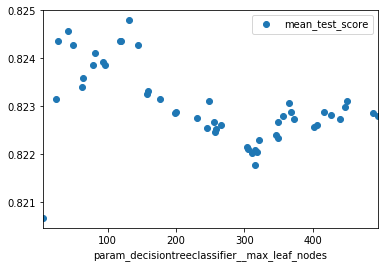

In [26]:
pd.DataFrame(sh.cv_results_).plot(x='param_decisiontreeclassifier__max_leaf_nodes', y='mean_test_score', marker='o', linewidth=0)

In [30]:
from dabl.explain import explain
explain(sh.best_estimator_, feature_names=data.drop(target, axis=1).columns)

ValueError: Don't know how to explain estimator Pipeline(steps=[('easypreprocessor', EasyPreprocessor()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_leaf_nodes=131))]) yet.

In [ ]:
from fml.preprocessing import detect_types_dataframe
detect_types_dataframe(X)

In [ ]:
n_values = X.apply(lambda x: x.nunique())
n_values

In [ ]:
fc = FriendlyClassifier().fit(X, y)

In [ ]:
from fml.preprocessing import detect_types_dataframe

In [ ]:
asdf = detect_types_dataframe(X, verbose=10)

In [ ]:
asdf.categorical

In [ ]:
"".join("{}: {} ".format(a, b) for a, b in asdf.categorical.items())

In [ ]:
X_cleanish.shape

In [ ]:
fp = FriendlyPreprocessor()
fp.fit_transform(X_cleanish).shape

In [ ]:
%%prun -s cumulative -l 100 -D test.prof
X_cleanish = safe_cleanup(X, onehot=True)
fc = FriendlyClassifier().fit(X_cleanish, y)

In [19]:
X.index = np.zeros(len(X))

In [22]:
X.index.is_unique

False

In [27]:
X = pd.DataFrame([[0, 1]], columns=['a', 'a'])
X

,a,a
0,0,1
